In [1]:
#This is a subtutorial to demonstrate how data quality information is stored

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import math
import gwpy
print(gwpy.__version__)

1.0.1


In [3]:
#--------------------
# Read in H5PY file 
#--------------------

filename = 'H-H1_LOSC_4_V1-815411200-4096.HDF5'
dataFile = h5py.File(filename, 'r')

In [7]:
#----------------------------------------------------------------------------
# Instantiate GPS start time, data quality information and list of bit names
#----------------------------------------------------------------------------

# Instantiates gpsStart with GPS start time from meta data
gpsStart = dataFile['meta']['GPSstart']

# Instantiates dqInfo with data quality information from quality data
dqInfo = dataFile['quality']['simple']

# Instantiates bitnameList with data quality names
bitnameList = dqInfo['DQShortnames']
nbits = len(bitnameList)

# Print list of names of data quality flags up to length of nbits

#------------------------------
# Data Failure Categories List
#------------------------------
# DATA - failing this level indicates that GWOSC data is not available
# CAT1 - failing this level indicates that there's a severe problem with this data and should not be searched for astrophysical signals
# CAT2 - failing this level indicates that there was a major instrumental problem at the time of collection
# CAT3 - failing this level indicates that there's a moderate concern or possible problem at the time of data collection; normally linked to data glitch levels
# CAT4 - this level indicates that data quality has been maintained and can be used to search for astrophysical signals
for bit in range(nbits):
    #Note: inserted paranthesis 
    print(bit, bitnameList[bit])


0 b'DATA'
1 b'CBCHIGH_CAT1'
2 b'CBCHIGH_CAT2'
3 b'CBCHIGH_CAT3'
4 b'CBCHIGH_CAT4'
5 b'CBCLOW_CAT1'
6 b'CBCLOW_CAT2'
7 b'CBCLOW_CAT3'
8 b'CBCLOW_CAT4'
9 b'BURST_CAT1'
10 b'BURST_CAT2'
11 b'BURST_CAT3'
12 b'BURST_CAT2E'
13 b'BURST_CAT3E'
14 b'CW_CAT1'
15 b'STOCH_CAT1'
16 b'STOCH_CAT2_H1L1'
17 b'STOCH_CAT2_H2L1'


In [28]:
# Data quality categories are stored with in a bit mask array with 4096 entries
# A bit mask is a binary number that represents something where 0 is unset and 1 is set; source https://blog.bitsrc.io/the-art-of-bitmasking-ec58ab1b4c03 

qmask = dqInfo['DQmask'].value

C:\Users\LAnderson\Anaconda3\envs\lscsoft\lib\site-packages\ipykernel_launcher.py:4: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  after removing the cwd from sys.path.


In [29]:
# To unpack the DATA and BURST category

sci = (qmask >> 0) & 1
burst1 = (qmask >> 9) & 1

In [30]:
goodData_1hz = sci & burst1

Text(0.5, 0, 'Time (s)')

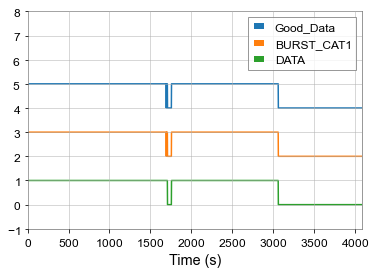

In [31]:
plt.plot(goodData_1hz + 4, label='Good_Data')
plt.plot(burst1 + 2, label='BURST_CAT1')
plt.plot(sci, label='DATA')
plt.axis([0, 4096, -1, 8])
plt.legend(loc=1)
plt.xlabel('Time (s)')